Retrieve data from World Health Organization

In [2]:

import requests

url = "https://ghoapi.azureedge.net/api/HIV_0000000001"

response = requests.get(url)

data = response.json()

countries = []
years = []
rates = []

for item in data['value']:
    countries.append(item['SpatialDim'])
    years.append(item['TimeDim'])
    rates.append(item['NumericValue'])

Create DataFrame with Arrays

In [3]:
import pandas as pd

data = {'Country':countries, 'Year':years, 'Rate': rates}
df = pd.DataFrame(data)
print(df)

     Country  Year        Rate
0     GLOBAL  2021  38400000.0
1        AFR  2021  25600000.0
2        AMR  2021   3800000.0
3        EMR  2021    430000.0
4        EUR  2021   2800000.0
...      ...   ...         ...
4487     VEN  2000     50000.0
4488     VNM  2000    120000.0
4489     YEM  2000      2200.0
4490     ZMB  2000    880000.0
4491     ZWE  2000   1600000.0

[4492 rows x 3 columns]


In [4]:
grouped_df = df.groupby(['Year']).sum()
print(grouped_df)

             Rate
Year             
1990   17041000.0
1991   20882000.0
1992   24787000.0
1993   29053000.0
1994   33310000.0
1995   37248000.0
1996   41106000.0
1997   44445000.0
1998   47506000.0
1999   50077000.0
2000   75801960.0
2001   77932160.0
2002   79401260.0
2003   80672450.0
2004   81432750.0
2005   82196180.0
2006   82902610.0
2007   84045400.0
2008   85141950.0
2009   86755230.0
2010   89360730.0
2011   91254160.0
2012   93134960.0
2013   95039910.0
2014   97231930.0
2015   99141030.0
2016  101127530.0
2017  102889070.0
2018  104760060.0
2019  106595270.0
2020  106896860.0
2021  108161460.0


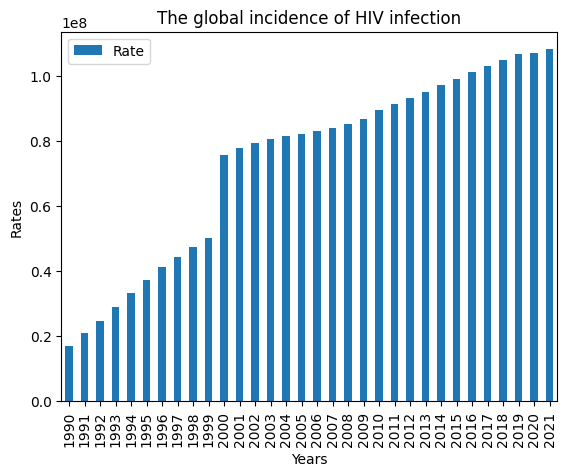

In [5]:
import matplotlib.pyplot as plt

new_df = grouped_df.reset_index()

new_df.plot(kind='bar',x='Year',y='Rate')

plt.xlabel('Years')
plt.ylabel('Rates')
plt.title('The global incidence of HIV infection')

plt.show()

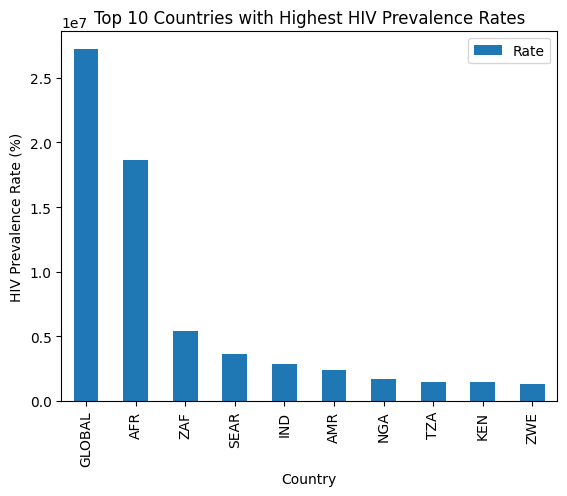

In [6]:
grouped_df = df.groupby('Country').mean().sort_values(by='Rate', ascending=False)
top_10 = grouped_df.nlargest(10,'Rate')
top_10['Country'] = top_10.index

top_10.plot(kind='bar', x='Country', y='Rate')
plt.xlabel('Country')
plt.ylabel('HIV Prevalence Rate (%)')
plt.title('Top 10 Countries with Highest HIV Prevalence Rates')

plt.show()